# Исследование данных о российском кинопрокате



**Постановка задачи**

Заказчик этого исследования — Министерство культуры Российской Федерации.
Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Нужно уделить внимание фильмам, которые получили государственную поддержку, и ответить на вопрос, насколько такие фильмы интересны зрителю.

**Описание данных**  

В нашем распоряжении данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

Таблице ***mkrf_movies*** содержит информацию из реестра прокатных удостоверений:

*title* — название фильма;  
*puNumber* — номер прокатного удостоверения;  
*show_start_date* — дата премьеры фильма;  
*type* — тип фильма;  
*film_studio* — студия-производитель;  
*production_country* — страна-производитель;  
*director* — режиссёр;  
*producer* — продюсер;  
*age_restriction* — возрастная категория;  
*refundable_support* — объём возвратных средств государственной поддержки;  
*nonrefundable_support* — объём невозвратных средств государственной поддержки;  
*financing_source* — источник государственного финансирования;  
*budget* — общий бюджет фильма;  
*ratings* — рейтинг фильма на КиноПоиске;  
*genres* — жанр фильма.  

Таблица ***mkrf_shows*** содержит сведения о показах фильмов в российских кинотеатрах:

*puNumber* — номер прокатного удостоверения;  
*box_office* — сборы в рублях.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Работа-с-исходными-файлами-с-данными" data-toc-modified-id="Работа-с-исходными-файлами-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Работа с исходными файлами с данными</a></span><ul class="toc-item"><li><span><a href="#Открытие-файлов-и-изучение-информации" data-toc-modified-id="Открытие-файлов-и-изучение-информации-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие файлов и изучение информации</a></span></li><li><span><a href="#Объединение-данных-в-единый-датафрейм" data-toc-modified-id="Объединение-данных-в-единый-датафрейм-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Объединение данных в единый датафрейм</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-типами-данных" data-toc-modified-id="Работа-с-типами-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с типами данных</a></span></li><li><span><a href="#Работа-с-пропусками-в-данных" data-toc-modified-id="Работа-с-пропусками-в-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Работа с пропусками в данных</a></span></li><li><span><a href="#Работа-с-дубликатами" data-toc-modified-id="Работа-с-дубликатами-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Работа с дубликатами</a></span></li><li><span><a href="#Работа-с-количественными-значениями" data-toc-modified-id="Работа-с-количественными-значениями-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Работа с количественными значениями</a></span></li><li><span><a href="#Работа-с-категориальными-значениями-и-добавление-новых-столбцов-с-данными" data-toc-modified-id="Работа-с-категориальными-значениями-и-добавление-новых-столбцов-с-данными-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Работа с категориальными значениями и добавление новых столбцов с данными</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных-о-прокате" data-toc-modified-id="Изучение-данных-о-прокате-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изучение данных о прокате</a></span></li><li><span><a href="#Изучение-данных-о-сборах" data-toc-modified-id="Изучение-данных-о-сборах-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изучение данных о сборах</a></span></li><li><span><a href="#Изучение-влияния-возрастного-ограничения-аудитории-на-сборы" data-toc-modified-id="Изучение-влияния-возрастного-ограничения-аудитории-на-сборы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изучение влияния возрастного ограничения аудитории на сборы</a></span></li><li><span><a href="#Изучение-фильмов,-которые-получили-государственную-поддержку" data-toc-modified-id="Изучение-фильмов,-которые-получили-государственную-поддержку-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изучение фильмов, которые получили государственную поддержку</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
print('Библиотеки успешно импортированы.')

Библиотеки успешно импортированы.


## Работа с исходными файлами с данными

### Открытие файлов и изучение информации

In [2]:
try:    
    mkrf_movies = pd.read_csv('datasets/mkrf_movies.csv')
    mkrf_shows = pd.read_csv('datasets/mkrf_shows.csv')
except:
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
print('Файлы загружены.')

Файлы загружены.


In [3]:
# для удобства работы с данными десятичные дроби будем отображать с двумя знаками после запятой
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None)

In [4]:
non_filtered_data_quantity = len(mkrf_movies)
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
mkrf_shows.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


### Объединение данных в единый датафрейм

Объединять данные будем по единому для них столбцу с номером прокатного удостоверения - *puNumber*. Для этого нужно убедиться, что у этого столбца в обеих таблицах одинаковый тип данных.

In [6]:
display(mkrf_movies.info())
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В первой таблице тип данных object, что помешает нам объеденить таблицы сразу. Найдём в первой таблице значение столбца *puNumber*, которое не даёт столбцу иметь целочисленный тип данных.

In [7]:
mkrf_movies[mkrf_movies['puNumber'].str.isalpha()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Уберём эту строчку и объединим столбцы таким образом, чтобы все значения таблицы ***mkrf_movies*** остались, и к ним добавились значения из таблицы ***mkrf_shows***. 

In [8]:
mkrf_movies = mkrf_movies[mkrf_movies['puNumber'] != 'нет'] 
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int64')
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод:** мы привели две таблицы к единому датафрейму и ознакомились с данными. На первый взгляд в данных присутствуют пропуски и неверные типы данных. Необходимо будет также проверить категориальные данные на дубликаты. Всё это мы рассмотрим подробнее и решим на этапе предобработки данных.

## Предобработка данных

### Работа с типами данных

Преобразуем столбец *show_start_date* к типу данных datetime.

In [10]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')

Столбец *ratings* должен иметь тип данных float. Выведем его уникальные значения, чтобы понять, почему его тип на данный момент - object.

In [11]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Как мы видим, некоторые рейтинги указаны в процентах. Уберём из данных знак процента и приведём их к десятичной дроби.

In [12]:
data['ratings'] = data['ratings'].str.replace('%','')
data['ratings'] = pd.to_numeric(data['ratings'])
data.loc[data['ratings'] > 10, 'ratings'] = data['ratings'] / 10

data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

### Работа с пропусками в данных

Изучим количество и долю пропусков в данных.

In [13]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

In [14]:
pd.DataFrame(round(data.isna().mean()*100, 1)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.200000
production_country,0.000000
director,0.100000
producer,7.600000
age_restriction,0.000000
refundable_support,95.600000


Заменим пропуски в столбцах *director*, *genres*, *producer*, *film_studio* на строку 'нет данных'.

In [15]:
data['director'].fillna('нет данных', inplace=True)
data['genres'].fillna('нет данных', inplace=True)
data['producer'].fillna('нет данных', inplace=True)
data['film_studio'].fillna('нет данных', inplace=True)

Пропуски в столбцах *refundable_support*, *nonrefundable_support*, *budget* и *financing_source* мы оставим, так как пропуски говорят о том, что фильм не получал государственную поддержку. Пропуски в стобце *box_office* также нужно оставить, так как они говорят о том, что данные о прокате в кинотеатрах данного фильма отсутствуют.

### Работа с дубликатами

Убедимся, что в данных нет полных строчек-дубликатов.

In [16]:
data.duplicated().sum()

0

Проверим на дубликаты столбец с номером прокатного удостоверения *puNumber*.

In [17]:
data[data['puNumber'].duplicated(keep=False)].sort_values('puNumber')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN


Под одинаковыми номерами прокатного удосторения записаны разные фильмы. Трудно предположить, почему так произошло, однако так как фильмы разные, убирать дубликаты мы не будем. 

Проверим столбец *type* на неявные дубликаты.

In [18]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Неявные дубликаты этого столбца вызваны тем, что перед началом слов в некоторых местах есть лишние пробелы, уберём их.

In [19]:
data['type'] = data['type'].str.strip()

### Работа с количественными значениями

Проведём проверку значений столбцов *budjet*, *refundable_support* и *nonrefundable_support*. В столбце *budjet* указан общий бюджет фильма. В двух других столбцах указана информация о возвратной и невозвратной поддержке от государства.

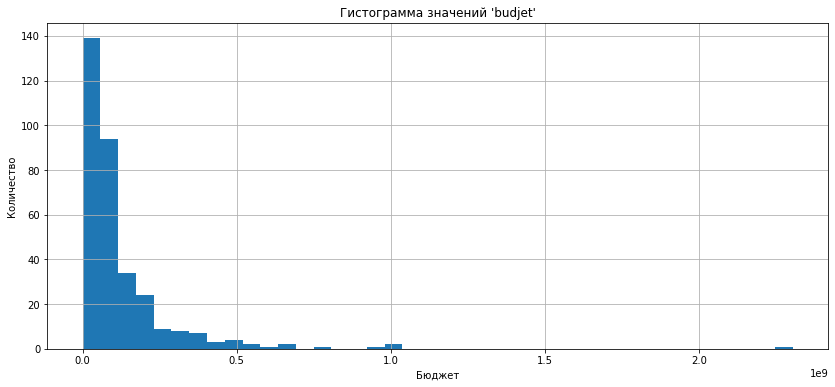

In [20]:
plt.ylabel('Количество')
plt.xlabel('Бюджет')
plt.title('Гистограмма значений \'budjet\'')
data['budget'].hist(bins=40, figsize=(14, 6));

In [21]:
df_budgets = data[['budget', 'refundable_support', 'nonrefundable_support']]
df_budgets[df_budgets.notna().any(axis=1)]

,budget,refundable_support,nonrefundable_support
1281,79411900.00,0.00,26500000.00
1448,37142857.00,0.00,26000000.00
1498,176023490.00,0.00,107847945.00
1524,40574140.00,0.00,28000000.00
1792,40015122.00,0.00,25000000.00
...,...,...,...
7463,980000000.00,100000000.00,400000000.00
7465,190000000.00,100000000.00,0.00
7473,944000000.00,100000000.00,400000000.00
7475,46154000.00,0.00,30000000.00


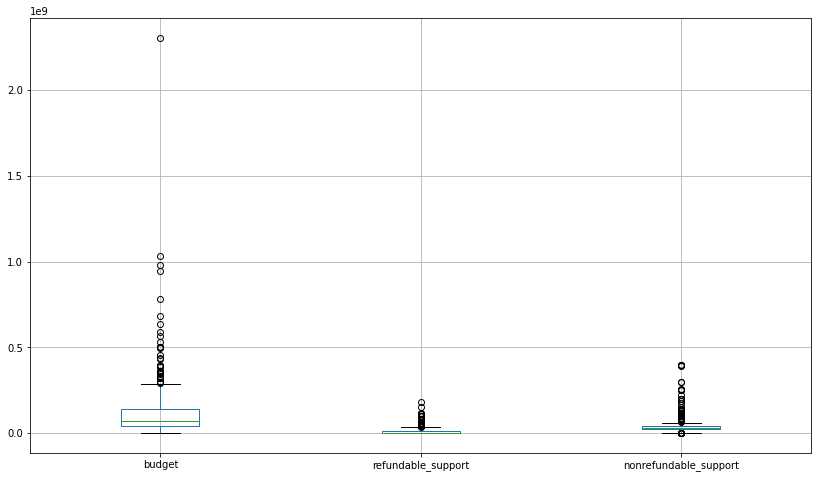

In [22]:
df_budgets.boxplot(figsize=(14, 8));

In [23]:
df_budgets.describe()

,budget,refundable_support,nonrefundable_support
count,332.00,332.00,332.00
mean,127229716.68,11864457.83,48980988.89
std,188588333.12,24916555.26,59980117.92
min,0.00,0.00,0.00
25%,42000000.00,0.00,25000000.00
50%,68649916.00,0.00,30000000.00
75%,141985319.50,15000000.00,40375000.00
max,2305074303.00,180000000.00,400000000.00


В столбце *budjet* есть очень выбивающееся максимальное значение, изучим этот фильм подробнее.

In [24]:
data[data['budget'] == data['budget'].max()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.00,90000000.00,2305074303.00,Фонд кино,5.80,"приключения,фэнтези",333597059.59


Судя по информации из открытых источников, бюджет фильма указан верно, поэтому эти данные мы оставим в таблице.

In [25]:
df_budgets[df_budgets['budget'] == 0]

,budget,refundable_support,nonrefundable_support
2052,0.00,0.00,23000000.00
2057,0.00,0.00,75000000.00
2471,0.00,10000000.00,70000000.00
2531,0.00,20000000.00,0.00
2614,0.00,60000000.00,100000000.00
2683,0.00,0.00,59000000.00
2787,0.00,0.00,35000000.00
2873,0.00,0.00,6000000.00
3046,0.00,19000000.00,51000000.00
3564,0.00,0.00,250000000.00


Мы обнаружили, что среди данных есть значения общего бюджета фильма, равное нулю, при этом известно, что они получили государственную поддержку. Нашему исследованию такие данные помешают, поэтому уберём их.

In [26]:
data = data.query('budget != 0')

### Работа с категориальными значениями и добавление новых столбцов с данными

Рассмотривая столбцы с категориальными значениями, обратим внимание на общую проблему, которая встречается почти во всех категориальных столбцах: количество уникальных значений.

In [27]:
print('Количество уникальных значений столбца \'genres\':', len(data['genres'].unique()))
print('Количество уникальных значений столбца \'director\':', len(data['director'].unique()))
print('Количество уникальных значений столбца \'show_start_date\':', len(data['show_start_date'].unique()))

Количество уникальных значений столбца 'genres': 743
Количество уникальных значений столбца 'director': 4802
Количество уникальных значений столбца 'show_start_date': 1963


Такое большое количество категорий усложнит наш анализ, поэтому создадим новые столбцы, сгруппировав эти значения по категориям.

In [28]:
# создадим столбец с годом выхода фильма
data['show_start_year'] = data['show_start_date'].dt.year

In [29]:
# добавим столбцы с главным режиссёром и главным жанром фильма. Для этого возьмём первые значения столбцов director и genres
def get_first_value(x):
    return x.split(',')[0]

data['main_director'] = data['director'].apply(get_first_value)
data['main_genre'] = data['genres'].apply(get_first_value)

Посчитаем количество уникальных значений в новых столбцах. 

In [30]:
print('Количество уникальных значений столбца \'main_genre\':', len(data['main_genre'].unique()))
print('Количество уникальных значений столбца \'main_director\':', len(data['main_director'].unique()))
print('Количество уникальных значений столбца \'show_start_year\':', len(data['show_start_year'].unique()))

Количество уникальных значений столбца 'main_genre': 29
Количество уникальных значений столбца 'main_director': 4604
Количество уникальных значений столбца 'show_start_year': 10


С этими категориями проводить анализ будет гораздо удобнее. 

Для цели нашего исследования добавим также столбец с долей государственной поддержки от общего бюджета картины.

In [31]:
data['government_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

**Вывод:** мы выполнили предобработку данных, поработав с типами данных, дубликатами, пропусками. Мы проанализировали количественные значения, убрав часть данных, тем самым улучшив общее качество данных, а также добавили необходимые для нашего исследования столбцы. 

In [32]:
filtered_data_quantity = len(data)
print('Количество строк до предобработки данных:', non_filtered_data_quantity)
print('Количество строк после предобработки данных:', filtered_data_quantity)
print(f'Мы убрали {1 - (filtered_data_quantity / non_filtered_data_quantity):.3f}% данных')

Количество строк до предобработки данных: 7486
Количество строк после предобработки данных: 7468
Мы убрали 0.002% данных


## Исследовательский анализ данных


### Изучение данных о прокате

Изучим количество фильмов, выходивших в прокат каждый год. Посчитаем долю фильмов, по которым известны данные о прокате.

In [33]:
groupped_by_year = data.groupby('show_start_year').agg({'box_office': 'count'})
groupped_by_year.columns = ['films_released']
groupped_by_year

,films_released
show_start_year,
2010,105
2011,109
2012,128
2013,184
2014,278
2015,459
2016,523
2017,355
2018,471


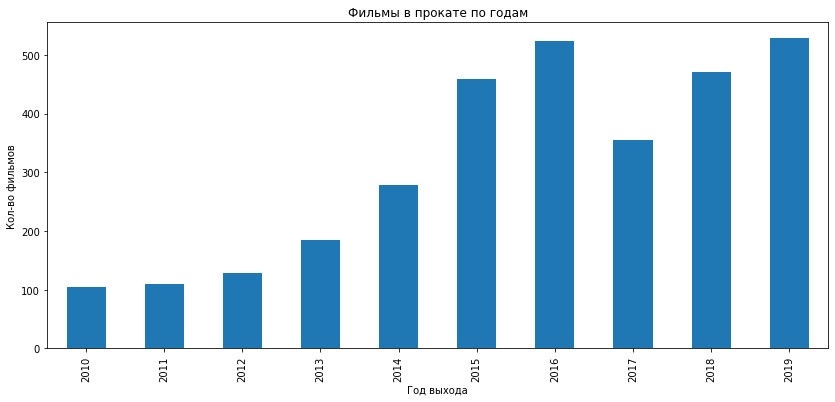

In [34]:
groupped_by_year.plot(
    title='Фильмы в прокате по годам',
    xlabel='Год выхода',
    ylabel='Кол-во фильмов',
    grid=False,
    figsize=(14, 6),
    kind='bar',
    legend=False
);

In [35]:
proportion_known_box_office = data['box_office'].count() / data['show_start_year'].count()
print(f'Доля фильмов с указанной информацией о прокате в кинотеатрах составляет {proportion_known_box_office:.2f}')

Доля фильмов с указанной информацией о прокате в кинотеатрах составляет 0.42


Рассмотрим, как доля фильмов с указанной информацией о прокате менялась в зависимости от года, чтобы понять, какой период полнее всего представлен в данных.

,known_box_office,total_quantity,proportion
show_start_year,,,
2010,105,985,0.11
2011,109,622,0.18
2012,128,593,0.22
2013,184,630,0.29
2014,278,805,0.35
2015,459,699,0.66
2016,523,815,0.64
2017,355,503,0.71
2018,471,887,0.53


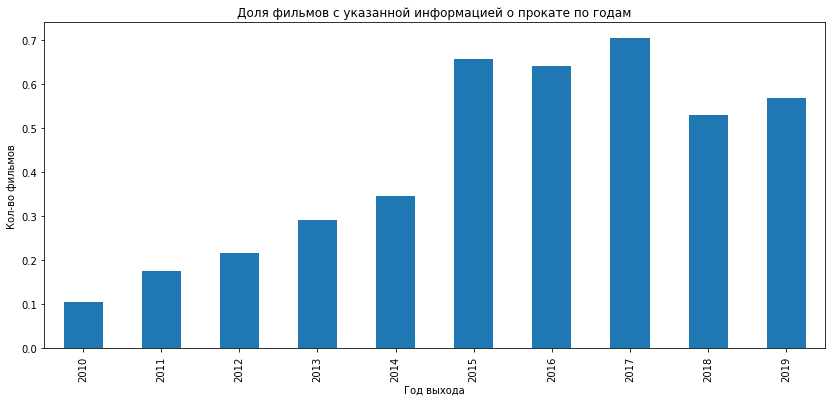

In [36]:
proportion_known_box_office_by_year = data.pivot_table(
    index='show_start_year',
    values=['box_office', 'puNumber'],
    aggfunc='count'
)
proportion_known_box_office_by_year.columns = ['known_box_office', 'total_quantity']
proportion_known_box_office_by_year['proportion'] = \
proportion_known_box_office_by_year['known_box_office'] / proportion_known_box_office_by_year['total_quantity']

display(proportion_known_box_office_by_year)

proportion_known_box_office_by_year.plot(
    title='Доля фильмов с указанной информацией о прокате по годам',
    xlabel='Год выхода',
    ylabel='Кол-во фильмов',
    grid=False,
    figsize=(14, 6),
    kind='bar',
    legend=False,
    y='proportion'
);

**Вывод:** среди всех данных у нас есть данные о прокате для 42% фильмов. За 2010-2012 года количество фильмов в кинотеатрах держалось приблизительно на одном уровне, от 100 до 130 фильмов, начиная с 2013 года начался резкий рост. Максимальное количество фильмов вышло в 2019 году и составило 529 фильмов. Минимальное - в 2010 году: 105 фильмов.  

Полнее всего в данных представлен период с 2015 по 2017 год, в эти года доля фильмов, по которым у нас есть данные о прокате, составляет от 0.64 до 0.75. За предыдущие годы эта доля не превышает 0.35, а за года 2018 и 2019 составляет 0.53-0.57 

### Изучение данных о сборах

Построим диаграмму размаха по данным сборов.

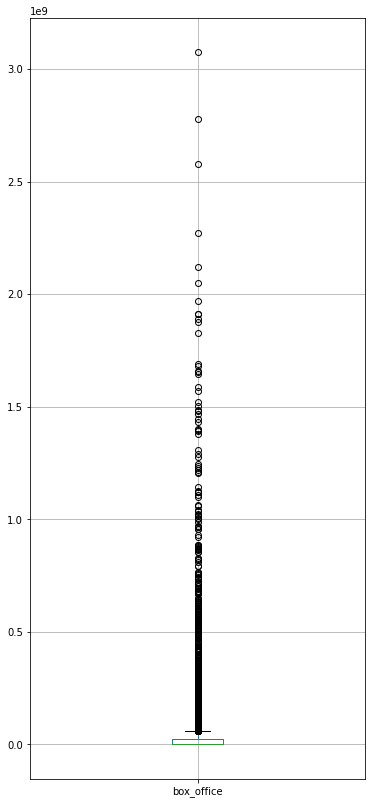

In [37]:
data.boxplot('box_office', figsize=(6, 14));

Изучим динамику суммы сборов в прокате по годам.

In [38]:
box_office_dynamic = data.groupby('show_start_year').agg({'box_office': 'sum'})
box_office_dynamic

,box_office
show_start_year,
2010,2428654.00
2011,14102765.00
2012,6955423.00
2013,29799706.20
2014,7434717843.10
2015,38527827199.09
2016,46742316269.48
2017,48458147253.75
2018,49251991405.20


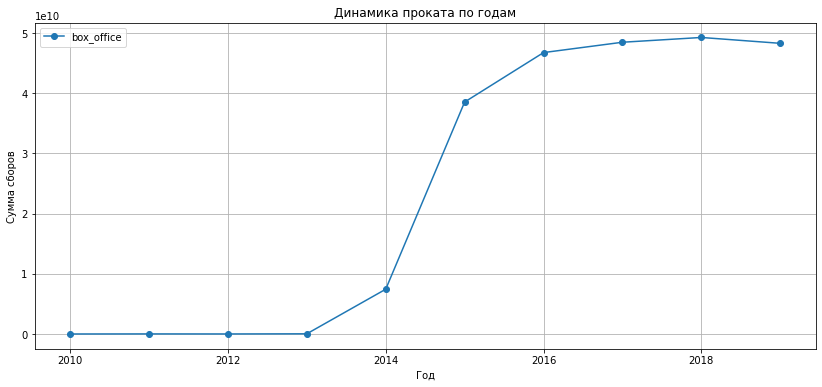

In [39]:
box_office_dynamic.plot(
    figsize=(14, 6),
    title='Динамика проката по годам',
    xlabel='Год',
    ylabel='Сумма сборов',
    style='o-',
    grid=True
);

In [40]:
box_office_dynamic.reset_index(inplace=True)
min_box_office = box_office_dynamic[box_office_dynamic['box_office'] == \
                                    box_office_dynamic['box_office'].min()].reset_index(drop=True)
max_box_office = box_office_dynamic[box_office_dynamic['box_office'] == \
                                    box_office_dynamic['box_office'].max()].reset_index(drop=True)
print(
    'Минимальная сумма сборов была в',
    min_box_office.loc[0, 'show_start_year'],
    'году и составила',
    min_box_office.loc[0, 'box_office'],
    '\nМаксимальная сумма сборов была в',
    max_box_office.loc[0, 'show_start_year'],
    'году и составила',
    max_box_office.loc[0, 'box_office']
)

Минимальная сумма сборов была в 2010 году и составила 2428654.0 
Максимальная сумма сборов была в 2018 году и составила 49251991405.19999


Посчитаем среднюю и медианную сумму сборов для каждого года.

In [41]:
pivot_box_office = data.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', 'median'])
pivot_box_office.columns = ['mean', 'median']
pivot_box_office

,mean,median
show_start_year,,
2010,23130.04,1700.00
2011,129383.17,3000.00
2012,54339.24,5660.00
2013,161954.92,3522.50
2014,26743589.36,18137.50
2015,83938621.35,4784781.50
2016,89373453.67,3776087.56
2017,136501823.25,9919415.00
2018,104568983.88,8751895.75


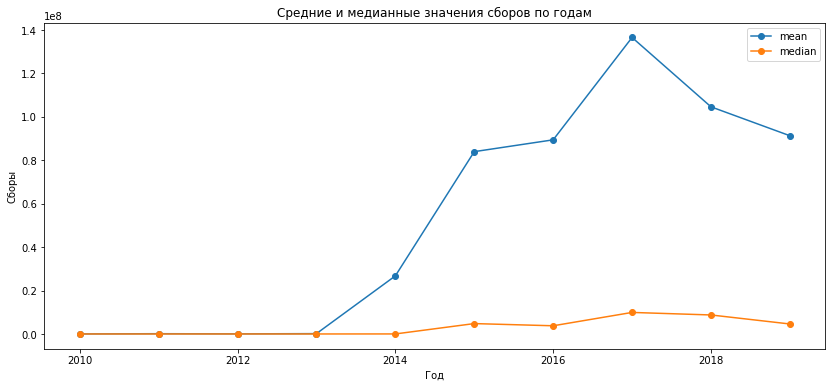

In [42]:
pivot_box_office.plot(
    title='Средние и медианные значения сборов по годам',
    xlabel='Год',
    ylabel='Сборы',
    figsize=(14, 6),
    style='o-'
);

**Вывод:** в 2010-2013 сумма сборов составляла от 2,4 млн до 30 млн рублей, начиная с 2014 года начался сильный рост и в 2015-2019 годах сумма сборов составляла от 38 млрд рублей. Минимальная сумма сборов была в 2010 году, она составила 2,4 млн рублей, максимальная сумма сборов была в 2018 году и составила 49 млрд рублей.  

Средние и медианные значения сборов сильно отличаются в связи с тем, что есть много сильно выбивающихся высоких значений сборов, что нам продемонстрировала диаграмма размаха.

### Изучение влияния возрастного ограничения аудитории на сборы

Рассмотрим влияние возрастного ограничения аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.

In [43]:
age_box_office = (
    data
    .query('show_start_year >= 2015')
    .pivot_table(index='age_restriction', values='box_office', aggfunc=['count', 'median'])
)
age_box_office.columns = ['films_quantity', 'median_box_office']
age_box_office

,films_quantity,median_box_office
age_restriction,,
«0+» - для любой зрительской аудитории,91,2943318.70
«12+» - для детей старше 12 лет,345,4902848.00
«16+» - для детей старше 16 лет,799,5461209.45
«18+» - запрещено для детей,791,6164575.34
«6+» - для детей старше 6 лет,311,13596322.70


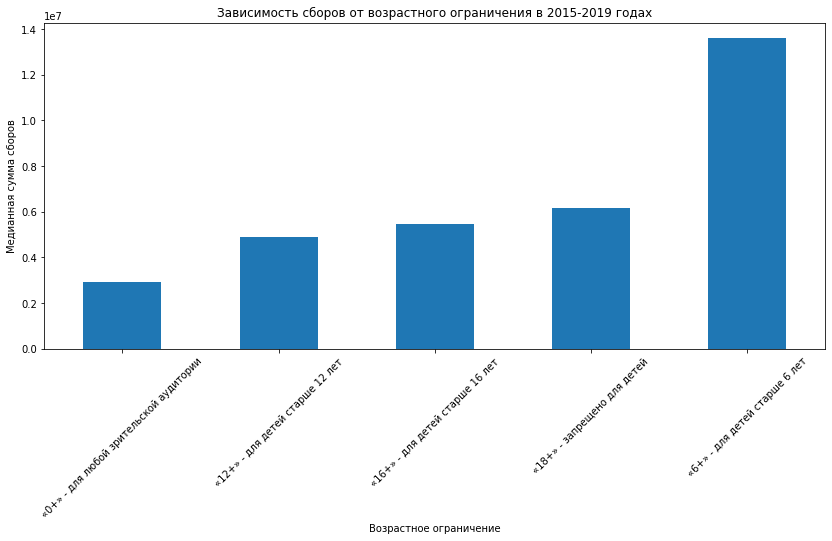

In [44]:
age_box_office['median_box_office'].plot(
    figsize=(14, 6),
    title='Зависимость сборов от возрастного ограничения в 2015-2019 годах',
    xlabel='Возрастное ограничение',
    ylabel='Медианная сумма сборов',
    kind='bar',
    grid=False,
    rot=45
);

Рассмотрим также результаты отдельно по каждому году. 

In [45]:
year_age_box_office = (
    data
    .query('show_start_year >= 2015')
    .pivot_table(index=['show_start_year', 'age_restriction'], values='box_office', aggfunc=['count', 'median'])
    
)
#year_age_box_office.columns = ['year', 'age_restriction', 'films_quantity', 'median_box_office']
year_age_box_office.columns = ['films_quantity', 'median_box_office']
year_age_box_office

films_quantity  \
show_start_year age_restriction                                          
2015            «0+» - для любой зрительской аудитории              39   
                «12+» - для детей старше 12 лет                     72   
                «16+» - для детей старше 16 лет                    165   
                «18+» - запрещено для детей                        131   
                «6+» - для детей старше 6 лет                       52   
2016            «0+» - для любой зрительской аудитории              41   
                «12+» - для детей старше 12 лет                     80   
                «16+» - для детей старше 16 лет                    181   
                «18+» - запрещено для детей                        151   
                «6+» - для детей старше 6 лет                       70   
2017            «0+» - для любой зрительской аудитории               3   
                «12+» - для детей старше 12 лет                     41   
                «16+» - для детей старше 16 лет                    120   
                «18+» - запрещено для детей                        147   
                «6+» - для детей старше 6 лет                       44   
2018            «0+» - для любой зрительской аудитории               5   
                «12+» - для детей старше 12 лет                     67   
                «16+» - для детей старше 16 лет                    155   
                «18+» - запрещено для детей                        179   
                «6+» - для детей старше 6 лет                       65   
2019            «0+» - для любой зрительской аудитории               3   
                «12+» - для детей старше 12 лет                     85   
                «16+» - для детей старше 16 лет                    178   
                «18+» - запрещено для детей                        183   
                «6+» - для детей старше 6 лет                       80   

                                                        median_box_office  
show_start_year age_restriction                                            
2015            «0+» - для любой зрительской аудитории         2943318.70  
                «12+» - для детей старше 12 лет               15144119.40  
                «16+» - для детей старше 16 лет                4321194.60  
                «18+» - запрещено для детей                    4654761.40  
                «6+» - для детей старше 6 лет                 19513253.93  
2016            «0+» - для любой зрительской аудитории         2571294.10  
                «12+» - для детей старше 12 лет                4225478.26  
                «16+» - для детей старше 16 лет                5085192.98  
                «18+» - запрещено для детей                    6107001.74  
                «6+» - для детей старше 6 лет                  3026256.15  
2017            «0+» - для любой зрительской аудитории        22178956.00  
                «12+» - для детей старше 12 лет                9010548.00  
                «16+» - для детей старше 16 лет                9641407.50  
                «18+» - запрещено для детей                    8212677.00  
                «6+» - для детей старше 6 лет                 50274982.00  
2018            «0+» - для любой зрительской аудитории         3616937.28  
                «12+» - для детей старше 12 лет                8931965.66  
                «16+» - для детей старше 16 лет                8751895.75  
                «18+» - запрещено для детей                    7179466.00  
                «6+» - для детей старше 6 лет                 14458669.43  
2019            «0+» - для любой зрительской аудитории         3885434.50  
                «12+» - для детей старше 12 лет                3405545.76  
                «16+» - для детей старше 16 лет                3210717.81  
                «18+» - запрещено для детей                    5603216.55  
                «6+» - для детей старше 6 лет                 12525531.67

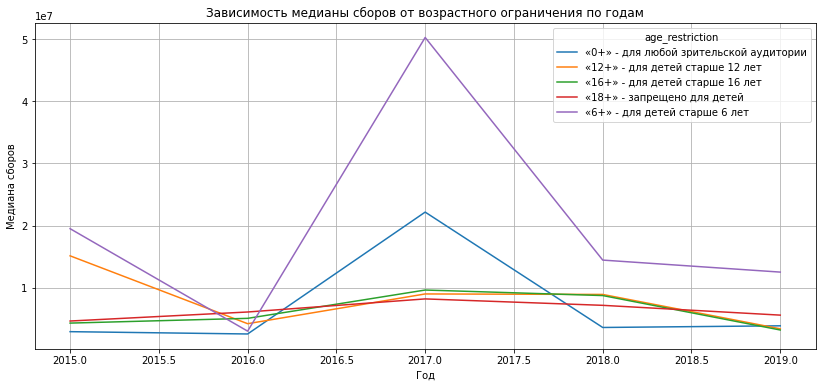

In [46]:
(
    data
    .query('show_start_year >= 2015')
    .pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc='median')
    .plot(
        figsize=(14, 6),
        title=f'Зависимость медианы сборов от возрастного ограничения по годам',
        xlabel='Год',
        ylabel='Медиана сборов',
        grid=True
    )
);

**Вывод:** в среднем больше всего сборов приносят фильмы с возрастным ограничением "6+" - для детей старше 6 лет. Сборы фильмов с таким ограничением как минимум в два раза больше, чем с любым другим ограничением. Мы можем предпопложить, что это связано с двумя факторами, во-первых, чаще всего родители сопровождают своих детей на фильмы этой возрастной категории, во-вторых, дети любят пересматривать любимые фильмы и мультфильмы.   

Похожие результаты показывают сборы в зависимости от возрастного ограничения по отдельным годам. Единсвтенным исключением стал 2016 год, когда все категории, кроме "0+", обогнали по сборам категорию "6+". 

Теперь рассмотрим общую сумму сборов по категориям за всё время и по годам. 

In [47]:
age_box_office_sum = (
    data
    .query('show_start_year >= 2015')
    .pivot_table(index='age_restriction', values='box_office', aggfunc=['count', 'sum'])
)
age_box_office_sum.columns = ['films_quantity', 'total_box_office']
age_box_office_sum = age_box_office_sum.sort_values('total_box_office', ascending=False)
age_box_office_sum

,films_quantity,total_box_office
age_restriction,,
«16+» - для детей старше 16 лет,799,75102265973.60
«12+» - для детей старше 12 лет,345,59369189769.50
«6+» - для детей старше 6 лет,311,55220193077.92
«18+» - запрещено для детей,791,40757657833.61
«0+» - для любой зрительской аудитории,91,809077425.97


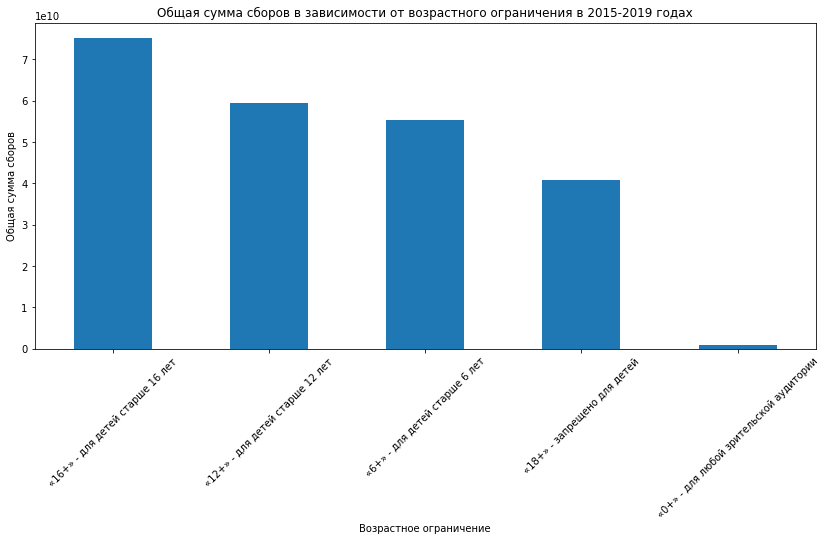

In [48]:
age_box_office_sum['total_box_office'].plot(
    figsize=(14, 6),
    title='Общая сумма сборов в зависимости от возрастного ограничения в 2015-2019 годах',
    xlabel='Возрастное ограничение',
    ylabel='Общая сумма сборов',
    kind='bar',
    grid=False,
    rot=45
);

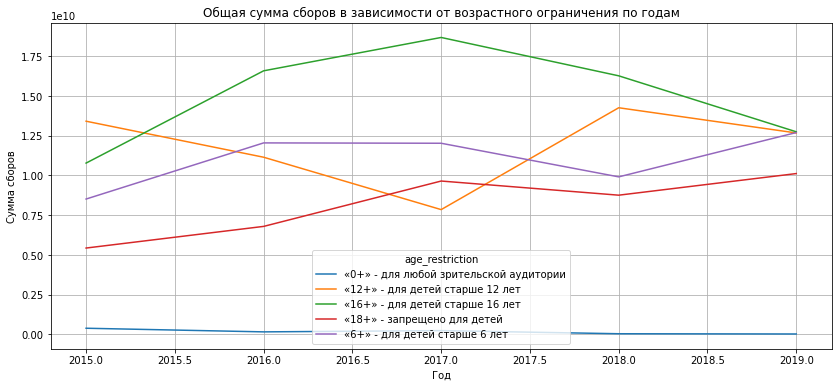

In [49]:
(
    data
    .query('show_start_year >= 2015')
    .pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc='sum')
    .plot(
        figsize=(14, 6),
        title=f'Общая сумма сборов в зависимости от возрастного ограничения по годам',
        xlabel='Год',
        ylabel='Сумма сборов',
        grid=True
    )
);

**Вывод:** за период с 2015 по 2019 года больше всего сборов принесли фильмы категории "16+": 75 млрд рублей. Меньше всего собрали фильмы категории "0+": 809 млн рублей. Сборы фильмов категории "16+" опережают другие категории во всех годах, кроме 2015, в этом году эти фильмы опередили фильмы категории "12+". Во всех годах самые низкие сборы у фильмов "0+".

### Изучение фильмов, которые получили государственную поддержку

Рассмотрим отдельно фильмы, которым была предоставлена государственная поддержка. 

In [50]:
data_supported = data[data['government_support'].notna()]
print('Количество фильмов с государственной поддержкой:', len(data_supported))

Количество фильмов с государственной поддержкой: 315


In [51]:
# добавим столбец с прибылью и с ROI (окупаемость вложений)
data_supported['profit'] = data_supported['box_office'] - data_supported['budget']
data_supported['roi'] = data_supported['profit'] / data_supported['budget'] * 100
data_supported.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,government_support,profit,roi
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,0.33,-79046546.40,-99.54
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,Министерство культуры,NaN,нет данных,28140.00,2014,А.Якимчук,нет данных,0.70,-37114717.00,-99.92
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,0.61,-156066458.50,-88.66
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69,-40518222.50,-99.86
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,0.62,-39783022.00,-99.42


In [52]:
data_supported[['refundable_support', 'nonrefundable_support']].describe()

,refundable_support,nonrefundable_support
count,315.00,315.00
mean,11603174.60,48107043.96
std,25151438.82,59886140.86
min,0.00,0.00
25%,0.00,25000000.00
50%,0.00,30000000.00
75%,10000000.00,40000000.00
max,180000000.00,400000000.00


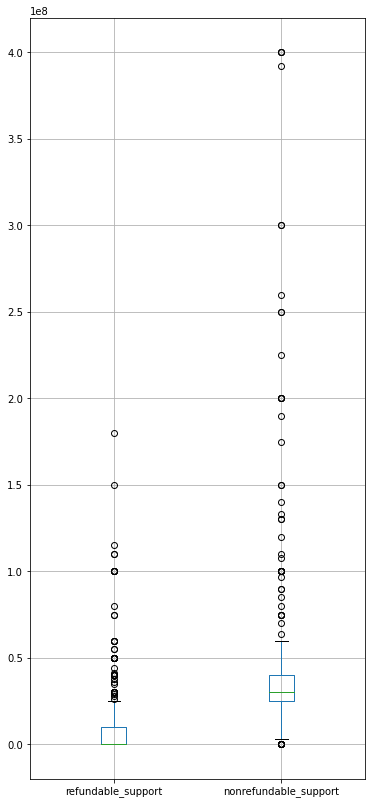

In [53]:
data_supported.boxplot(['refundable_support', 'nonrefundable_support'], figsize=(6, 14));

Мы можем заметить, что  чаще предоставляется именно невозвратная поддержка, а суммы по ней выше. Рассмотрим суммы возвратной и невозвратной поддержки.

count         101.00
mean     36188118.81
std      32981331.01
min       3500000.00
25%      15000000.00
50%      25000000.00
75%      50000000.00
max     180000000.00
Name: refundable_support, dtype: float64

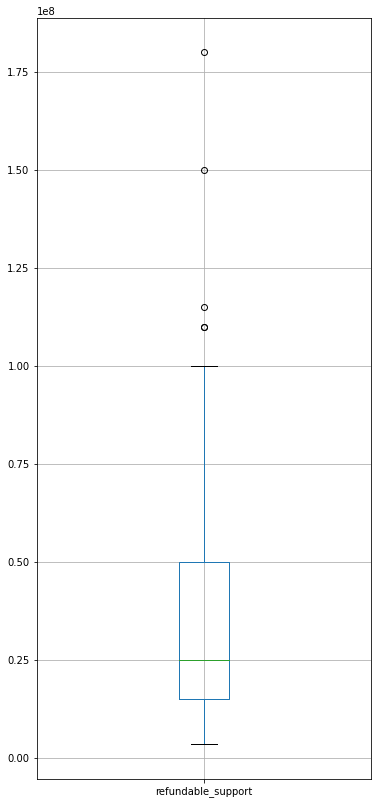

In [54]:
refundable_support = data_supported[data_supported['refundable_support'] != 0]
display(refundable_support['refundable_support'].describe())
refundable_support.boxplot('refundable_support', figsize=(6, 14));

count         307.00
mean     49360647.71
std      60150060.16
min       3000000.00
25%      25000000.00
50%      30000000.00
75%      40000000.00
max     400000000.00
Name: nonrefundable_support, dtype: float64

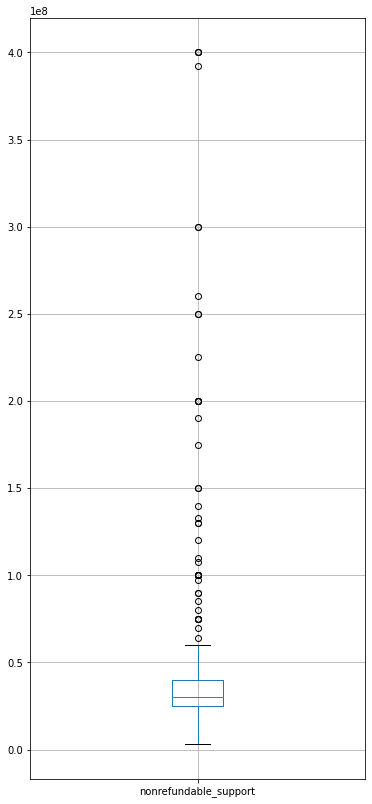

In [55]:
nonrefundable_support = data_supported[data_supported['nonrefundable_support'] != 0]
display(nonrefundable_support['nonrefundable_support'].describe())
nonrefundable_support.boxplot('nonrefundable_support', figsize=(6, 14));

Возвратная поддержка была оказана фильмам из нашего датафрейма 101 раз, в среднем она составляет 25 млн рублей. Максимальная возвратная поддержка составила 180 млн, а минимальная 3,5 млн.  
Невозвратная поддержка была оказана 307 раз, в среднем она составляет 30 млн рублей. Максимальная невозвратная поддержка составила 400 млн, а минимальная 3 млн.  

In [56]:
data_supported['government_support'].describe()

count   315.00
mean      0.52
std       0.17
min       0.04
25%       0.37
50%       0.59
75%       0.66
max       0.78
Name: government_support, dtype: float64

В среднем государственная поддержка фильмов составляет 59% от общего бюджета. Максимальный процент гос. поддержки составляет 78%, а минимальный - 4%.

count    301.00
mean     -23.67
std      167.29
min     -100.00
25%      -97.75
50%      -85.13
75%      -21.61
max     1820.98
Name: roi, dtype: float64

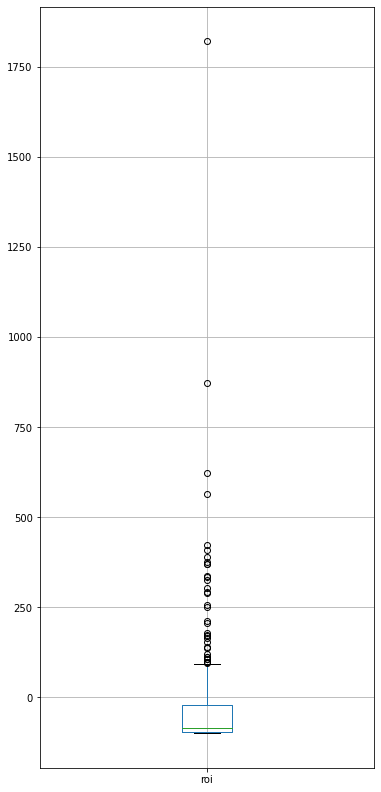

In [57]:
display(data_supported['roi'].describe())
data_supported.boxplot('roi', figsize=(6, 14));

In [58]:
print('Окупилось фильмов с государственной поддержкой:', len(data_supported[data_supported['roi'] >= 0]))
print('Не окупилось фильмов с государственной поддержкой:', len(data_supported[data_supported['roi'] < 0]))

Окупилось фильмов с государственной поддержкой: 66
Не окупилось фильмов с государственной поддержкой: 235


Чаще фильмы с государственной поддержкой не окупаются, из 301 фильма, у которых есть информация о прокате, окупилось всего 66 фильмов. Максимальный ROI составляет 1820%, но в основном ROI окупившихся фильмов не превышает отметку в 500%.

count   300.00
mean      6.04
std       1.16
min       1.00
25%       5.40
50%       6.20
75%       6.70
max       9.40
Name: ratings, dtype: float64

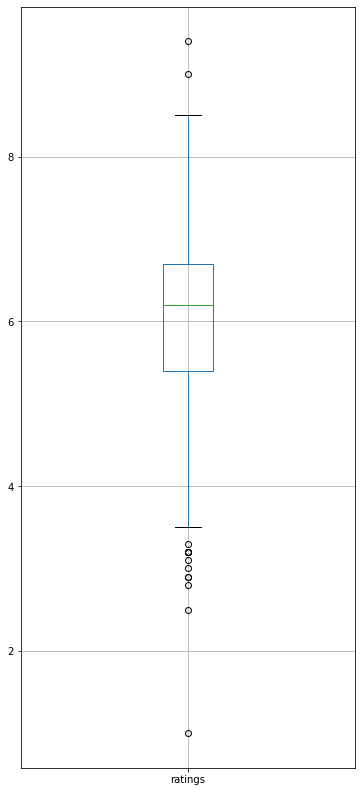

In [59]:
display(data_supported['ratings'].describe())
data_supported.boxplot('ratings', figsize=(6, 14));

In [60]:
data_supported['roi'].corr(data_supported['ratings'])

0.0642434642786107

Средний рейтинг фильмов с государственной поддержкой составляет 6,2 с максимальным и минимальным значением 1 и 9,4. Зависимость между рейтингом и окупаемостью фильма отсутствует.

Сравним также средний рейтинг российских фильмов с гос. поддержкой и средний рейтинг российских фильмов без гос. поддержки. 

In [61]:
data[(data['government_support'].isna()) & (data['production_country'].str.contains('Россия'))]['ratings'].describe()

count   1098.00
mean       6.20
std        1.44
min        1.10
25%        5.40
50%        6.40
75%        7.20
max        9.90
Name: ratings, dtype: float64

Средний рейтинг фильмов без государственной поддержкой выше, чем у фильмов с государсвтвенной поддержкой, и составляет 6,4. Минимальный и максимальный рейтинг без государственной поддержки также выше, и составляет 1.1 и 9.9 

Рассмотрим также источники финансирования фильмов с гос. поддержкой.

In [62]:
data_supported.groupby('financing_source')['puNumber'].count().sort_values(ascending=False)

financing_source
Министерство культуры               163
Фонд кино                           131
Министерство культуры, Фонд кино     21
Name: puNumber, dtype: int64

In [63]:
(
    data_supported
    .pivot_table(index='financing_source', values = ['refundable_support', 'nonrefundable_support'], aggfunc=['median', 'sum'])
)

median                     \
                                 nonrefundable_support refundable_support   
financing_source                                                            
Министерство культуры                      28000000.00               0.00   
Министерство культуры, Фонд кино           30000000.00         9000000.00   
Фонд кино                                  40000000.00        15000000.00   

                                                   sum                     
                                 nonrefundable_support refundable_support  
financing_source                                                           
Министерство культуры                    4830661000.00               0.00  
Министерство культуры, Фонд кино          836931354.00       325500000.00  
Фонд кино                                9486126493.00      3329500000.00

Министерство культуры спонсирует фильмы чаще, чем Фонд кино, при этом министерство культуры оказывает только невозвратную поддержку. В среднем Министерство культуры предоставляет 28 млн рублей. За всё время поддержка Министерства культуры составила более 4,8 млрд рублей. 

Фонд кино оказывает как невозвратную, так и возвратную поддержку. В среднем в качестве невозвратной поддержки Фондом кино предоставляется 40 млн рублей, а в качестве возвратной - 15 млн рублей. За всё время невозвратная поддержка Фонда кино составила более 9,4 млрд рублей, а возвратная более 3,3 млрд рублей.

## Общий вывод

Мы провели исследование рынка российского кинопроката, чтобы выявить текущие тенденции, уделяя особое внимание фильмам, которые получили государственную проддержку, чтобы понять, насколько такие фильмы интересны зрителю. Для этого исследования мы использовали данные, опубликованные на портале министерства культуры.

Мы использовали две таблицы с данными, в одной из таблиц были данные из реестра прокатных удостоверений, а во второй содержались сведения о показах фильмов в российских кинотеатрах. Мы объединили эти таблицы в единый датафрейм, состоящий из 7485 строк и 16 столбцов. Мы провели предобработку данных, состоящую из работы с пропусками, с неверными типами данных, с дубликатами и с редкими выбивающимися значениями. Во время предобработки данных для целей нашего исследования мы удалили из оригинальной таблицы 0.002% данных. Мы также добавили в датафрейм дополнительные столбцы, сгруппировав некоторые категориальные значения по более широким категориям для удобства анализа.

Данные о прокате есть для 42% фильмов таблицы. При этом полнее всего в данных представлен период с 2015 по 2017 года, в этот период есть данные о прокате примерно у 70% фильмов. В 2010-2013 годах общая сумма сборов составляла от 2,4 до 30 млн при количестве выходивших фильмов от 100 до 180, после чего произошёл резкий рост, и общая сумма сборов в 2015-2019 составляла от 38 до 49 млрд рублей при количестве фильмов в прокате от 350 до 530. Средние и медианные значения сборов в 2015-2019 годах тоже выросли относительно 2010-2014 годов, достугнув своего пика в 2017 году.

Мы выяснили, что сборы зависят от возрастного ограничения аудитории фильма. Средние сборы фильмов с возрастным ограничением "6+" с отрывом более чем в два раза опережают средние сборы любой другой категории. При этом больше всего за всё время собрали фильмы с возрастным ограничением "16+"

Количество фильмов нашей таблицы, для которых была предоставлена государственная поддержка, составляет 315. Чаще государство предоставляет именно невозвратную поддержку (307 случаев), чем возвратную (101 случай). Суммы у невозвратной поддержки тажке обычно выше, чем у возвратной. В среднем невозвратная поддержка составляет около 30 млн, а возвратная около 25 млн. Из фильмов с гос.поддержкой, о которых у нас есть информация о сборах, окупились 66, а не окупились 235, из чего можно сделать вывод, что фильмы с гос. поддержкой чаще неинтересны зрителю. ROI окупившихся фильмов с гос. поддержкой в основном не превышает 500%. 

Средний рейтинг фильмов с гос. поддержкой составляет 6.2, но зависимость между рейтингом и окупаемостью отсутствует. Средний рейтинг фильмов без гос. поддержки выше и составляет 6.4.

Гос. поддержка осуществляется Министерством культуры, Фондом кино или обеими организациями сразу. Министерство культуры оказывает только невозвратную поддержку. Поддержка Фонда кино в среднем выше, но Фонд кино оказывает как невозвратную, так и возвратную поддержку.